In [46]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from  statsmodels.stats.proportion import proportion_confint

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [28]:
np.random.seed(42)
stat_population = np.concatenate((np.full(49, 0), np.array([1])))

In [29]:
stat_population

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [48]:
p = stat_population.mean()
p - sts.norm.ppf(1-0.05/2)*(np.sqrt((p * (1 - p)) / (len(stat_population))))

-0.018805307081790974

In [37]:
proportion_confint(stat_population.sum(), len(stat_population),
                   0.05, 'normal')

(0.0, 0.05880530708179099)

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [36]:
proportion_confint(stat_population.sum(), len(stat_population),
                   0.05, 'wilson')

(0.003539259271646236, 0.10495443589637815)

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 
±0.01 на уровне доверия 95%?

In [49]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [78]:
def y(p):
    return np.ceil(samplesize_confint_proportion(p, 0.01, 0.05))

In [84]:
y(stat_population.mean())

753.0

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [71]:
p = np.linspace(0,1)
yy = [y(p) for p in p]

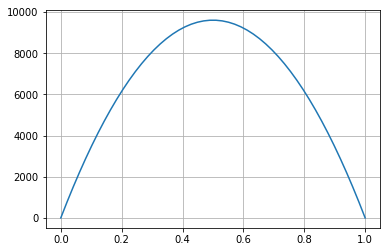

In [74]:
plt.plot(p, yy)
plt.grid(True);

In [83]:
scipy.optimize.minimize_scalar(lambda x: -y(x))

     fun: -9604.0
    nfev: 26
     nit: 22
 success: True
       x: 0.4999622632460086

In [90]:
np.random.randint(0, 23, (1000, 23))

array([[10, 17, 18, ..., 12, 11, 18],
       [ 9, 12, 14, ..., 13,  3,  2],
       [ 2, 10,  4, ...,  8, 11, 18],
       ...,
       [11,  9,  8, ..., 13,  5,  5],
       [ 8,  4,  6, ..., 20, 20, 13],
       [14, 22, 10, ..., 21,  9,  0]])

In [92]:
sts.norm.ppf(1-0.003/2)

2.9677379253417944